# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv("breast-cancer.csv")

# Understanding Data

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [5]:
df.shape

(569, 32)

## Removing 'id' column

In [6]:
df['id'].nunique()

569

- This column is useless. So, let's drop it

In [7]:
df = df.drop(columns = ['id'])

In [8]:
df.shape

(569, 31)

## Checking dtypes and NaN values 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Checking for Duplicates

In [10]:
df.duplicated().sum()

0

## Statistical Summary

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Exploratory Data Analysis (EDA)

# Univariate Analysis 

## Box Plots

In [12]:
x = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

In [13]:
x.shape, y.shape

((569, 30), (569,))

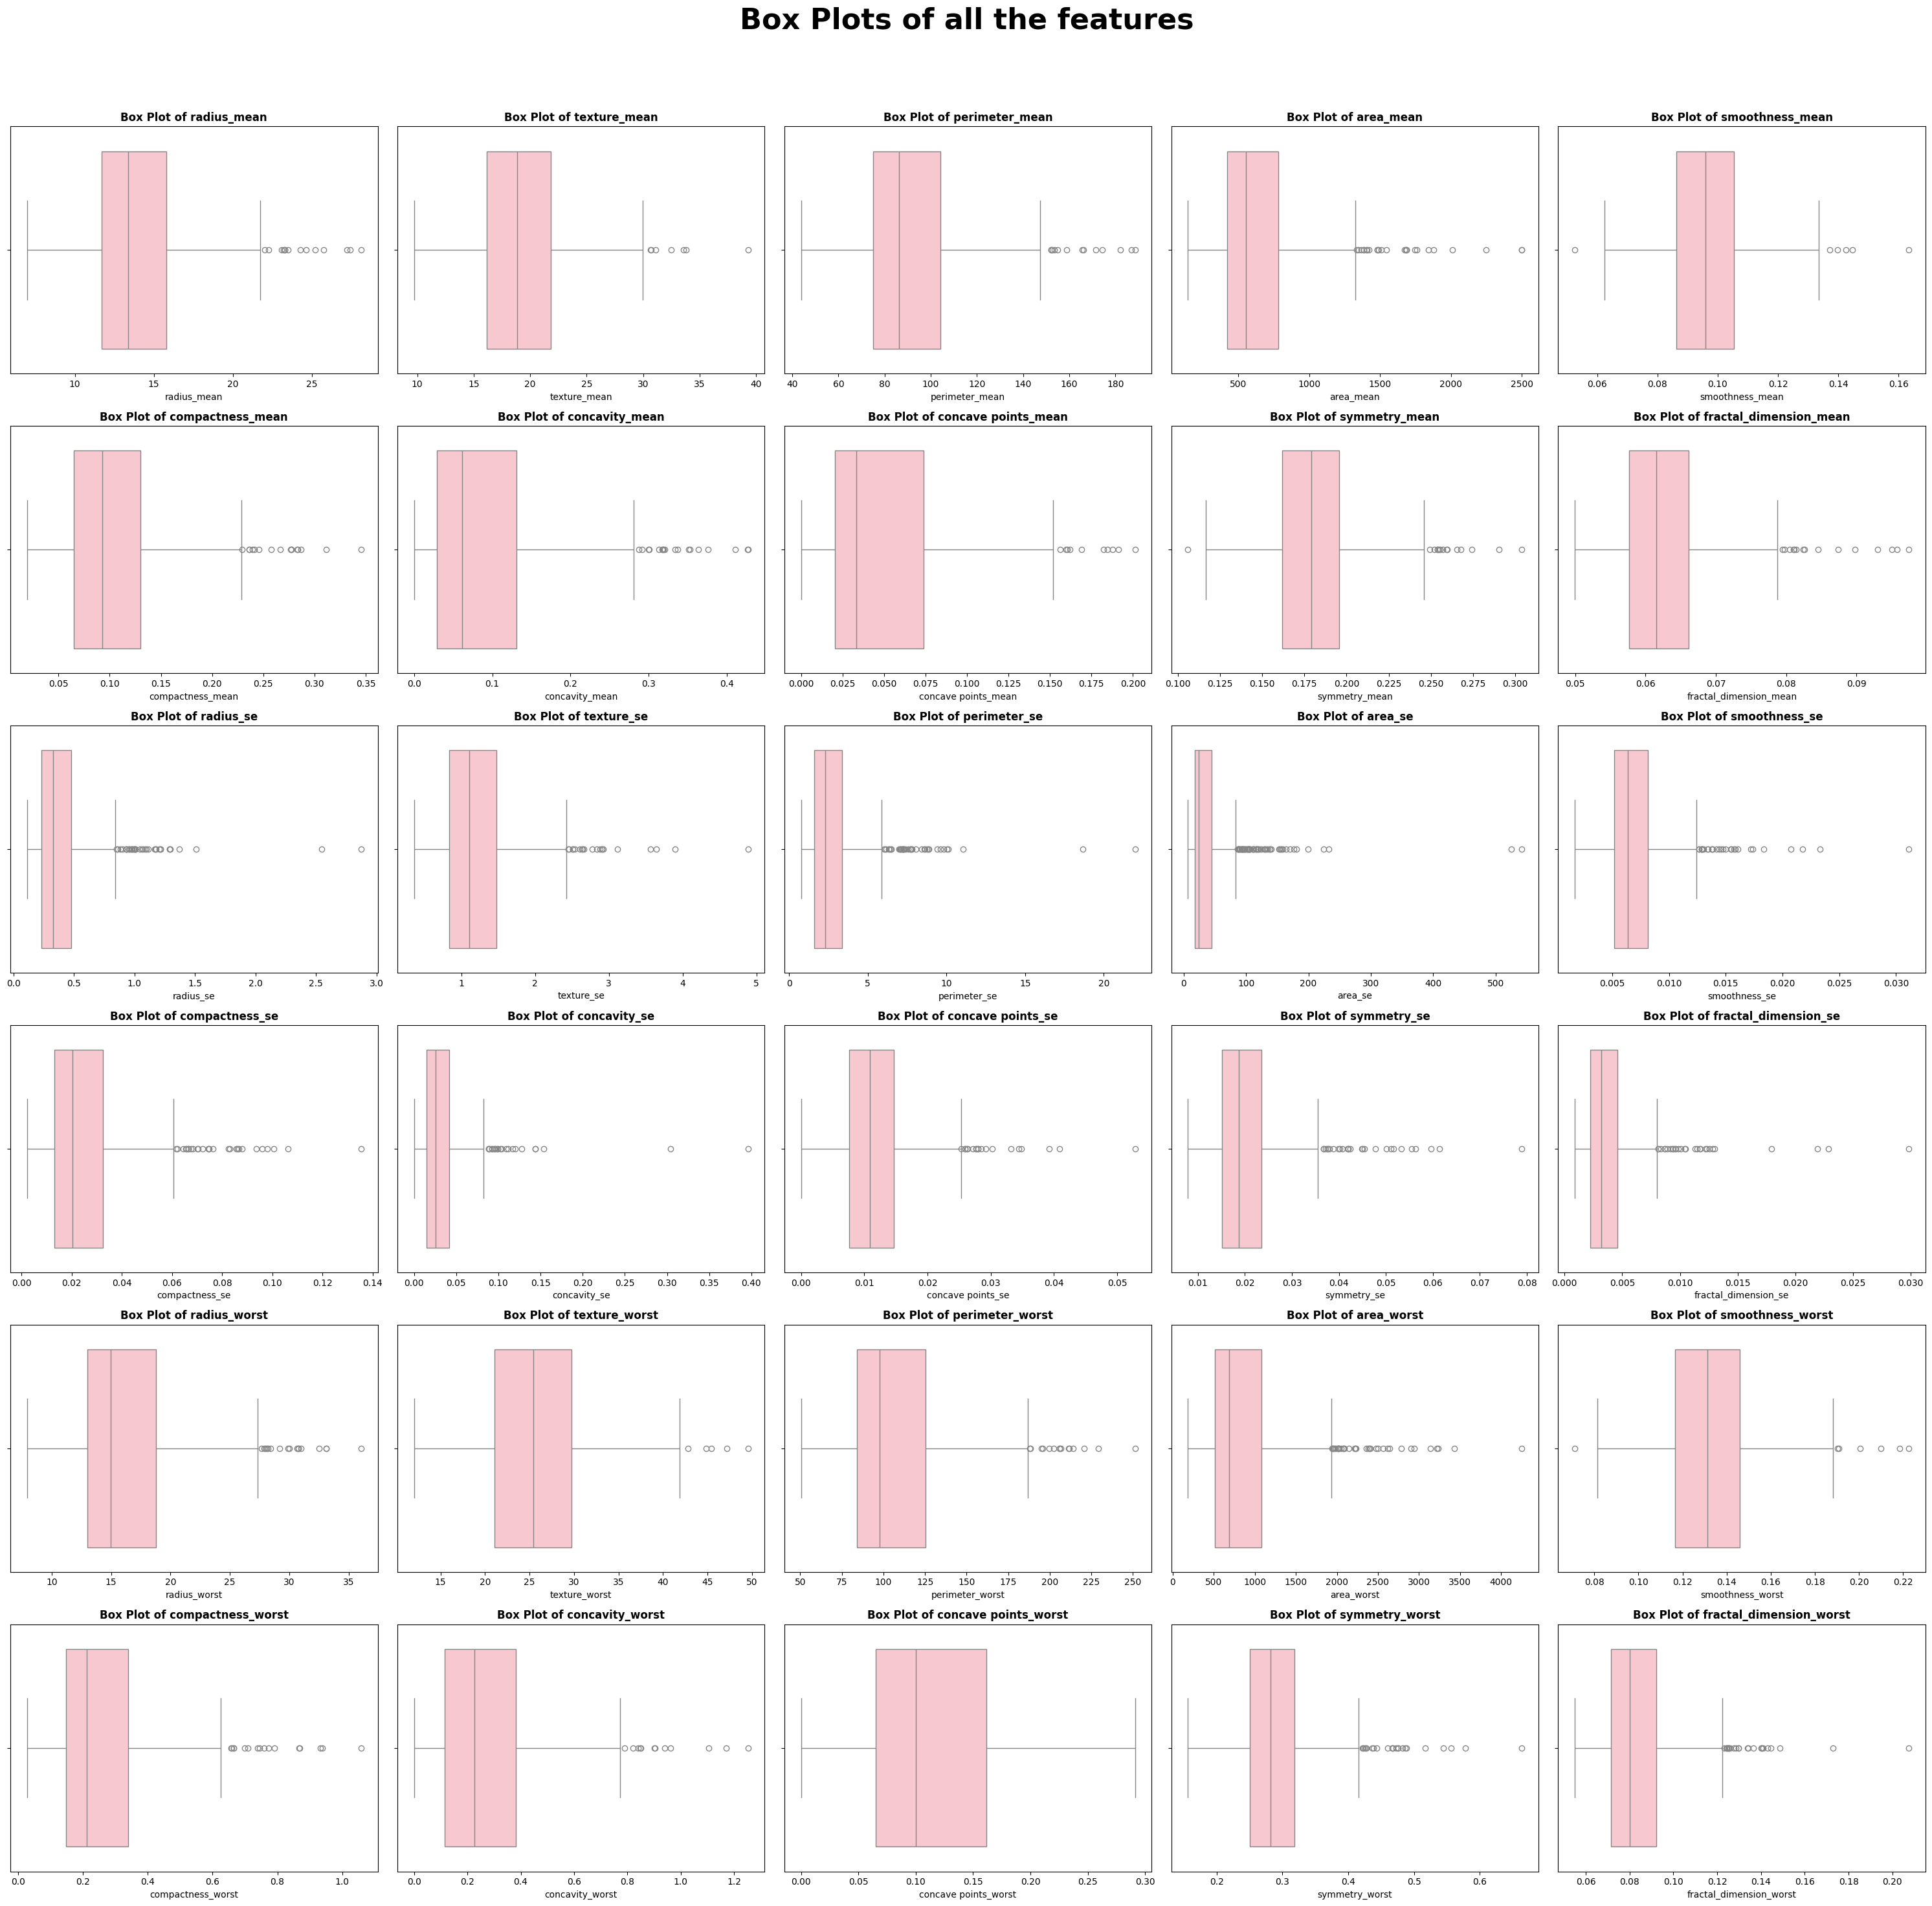

In [14]:
import math 

cols = 5
rows = math.ceil(x.columns.nunique()/cols)

fig, axes = plt.subplots(rows, cols, figsize = (30, 5*rows))

axes = axes.flatten() if rows > 1 else axes

fig.suptitle("Box Plots of all the features", fontsize = 32, weight = 'bold')

for i, feature in enumerate(x.columns):
    
    if i < len(axes):
    
        sns.boxplot(data = df, x = feature, ax = axes[i], color = 'pink')
    
        axes[i].set_title(f"Box Plot of {feature}", weight = 'bold')
        
for j in range(i+1, rows*cols):
    
    if j < len(axes):
        
        axes[j].set_visible(False)
        
fig.tight_layout(rect=[0, 0, 1, 0.95])

As we can see, there are a lot of outliers in each feature which will be handled later on.

## Distribution Plots (Histograms)

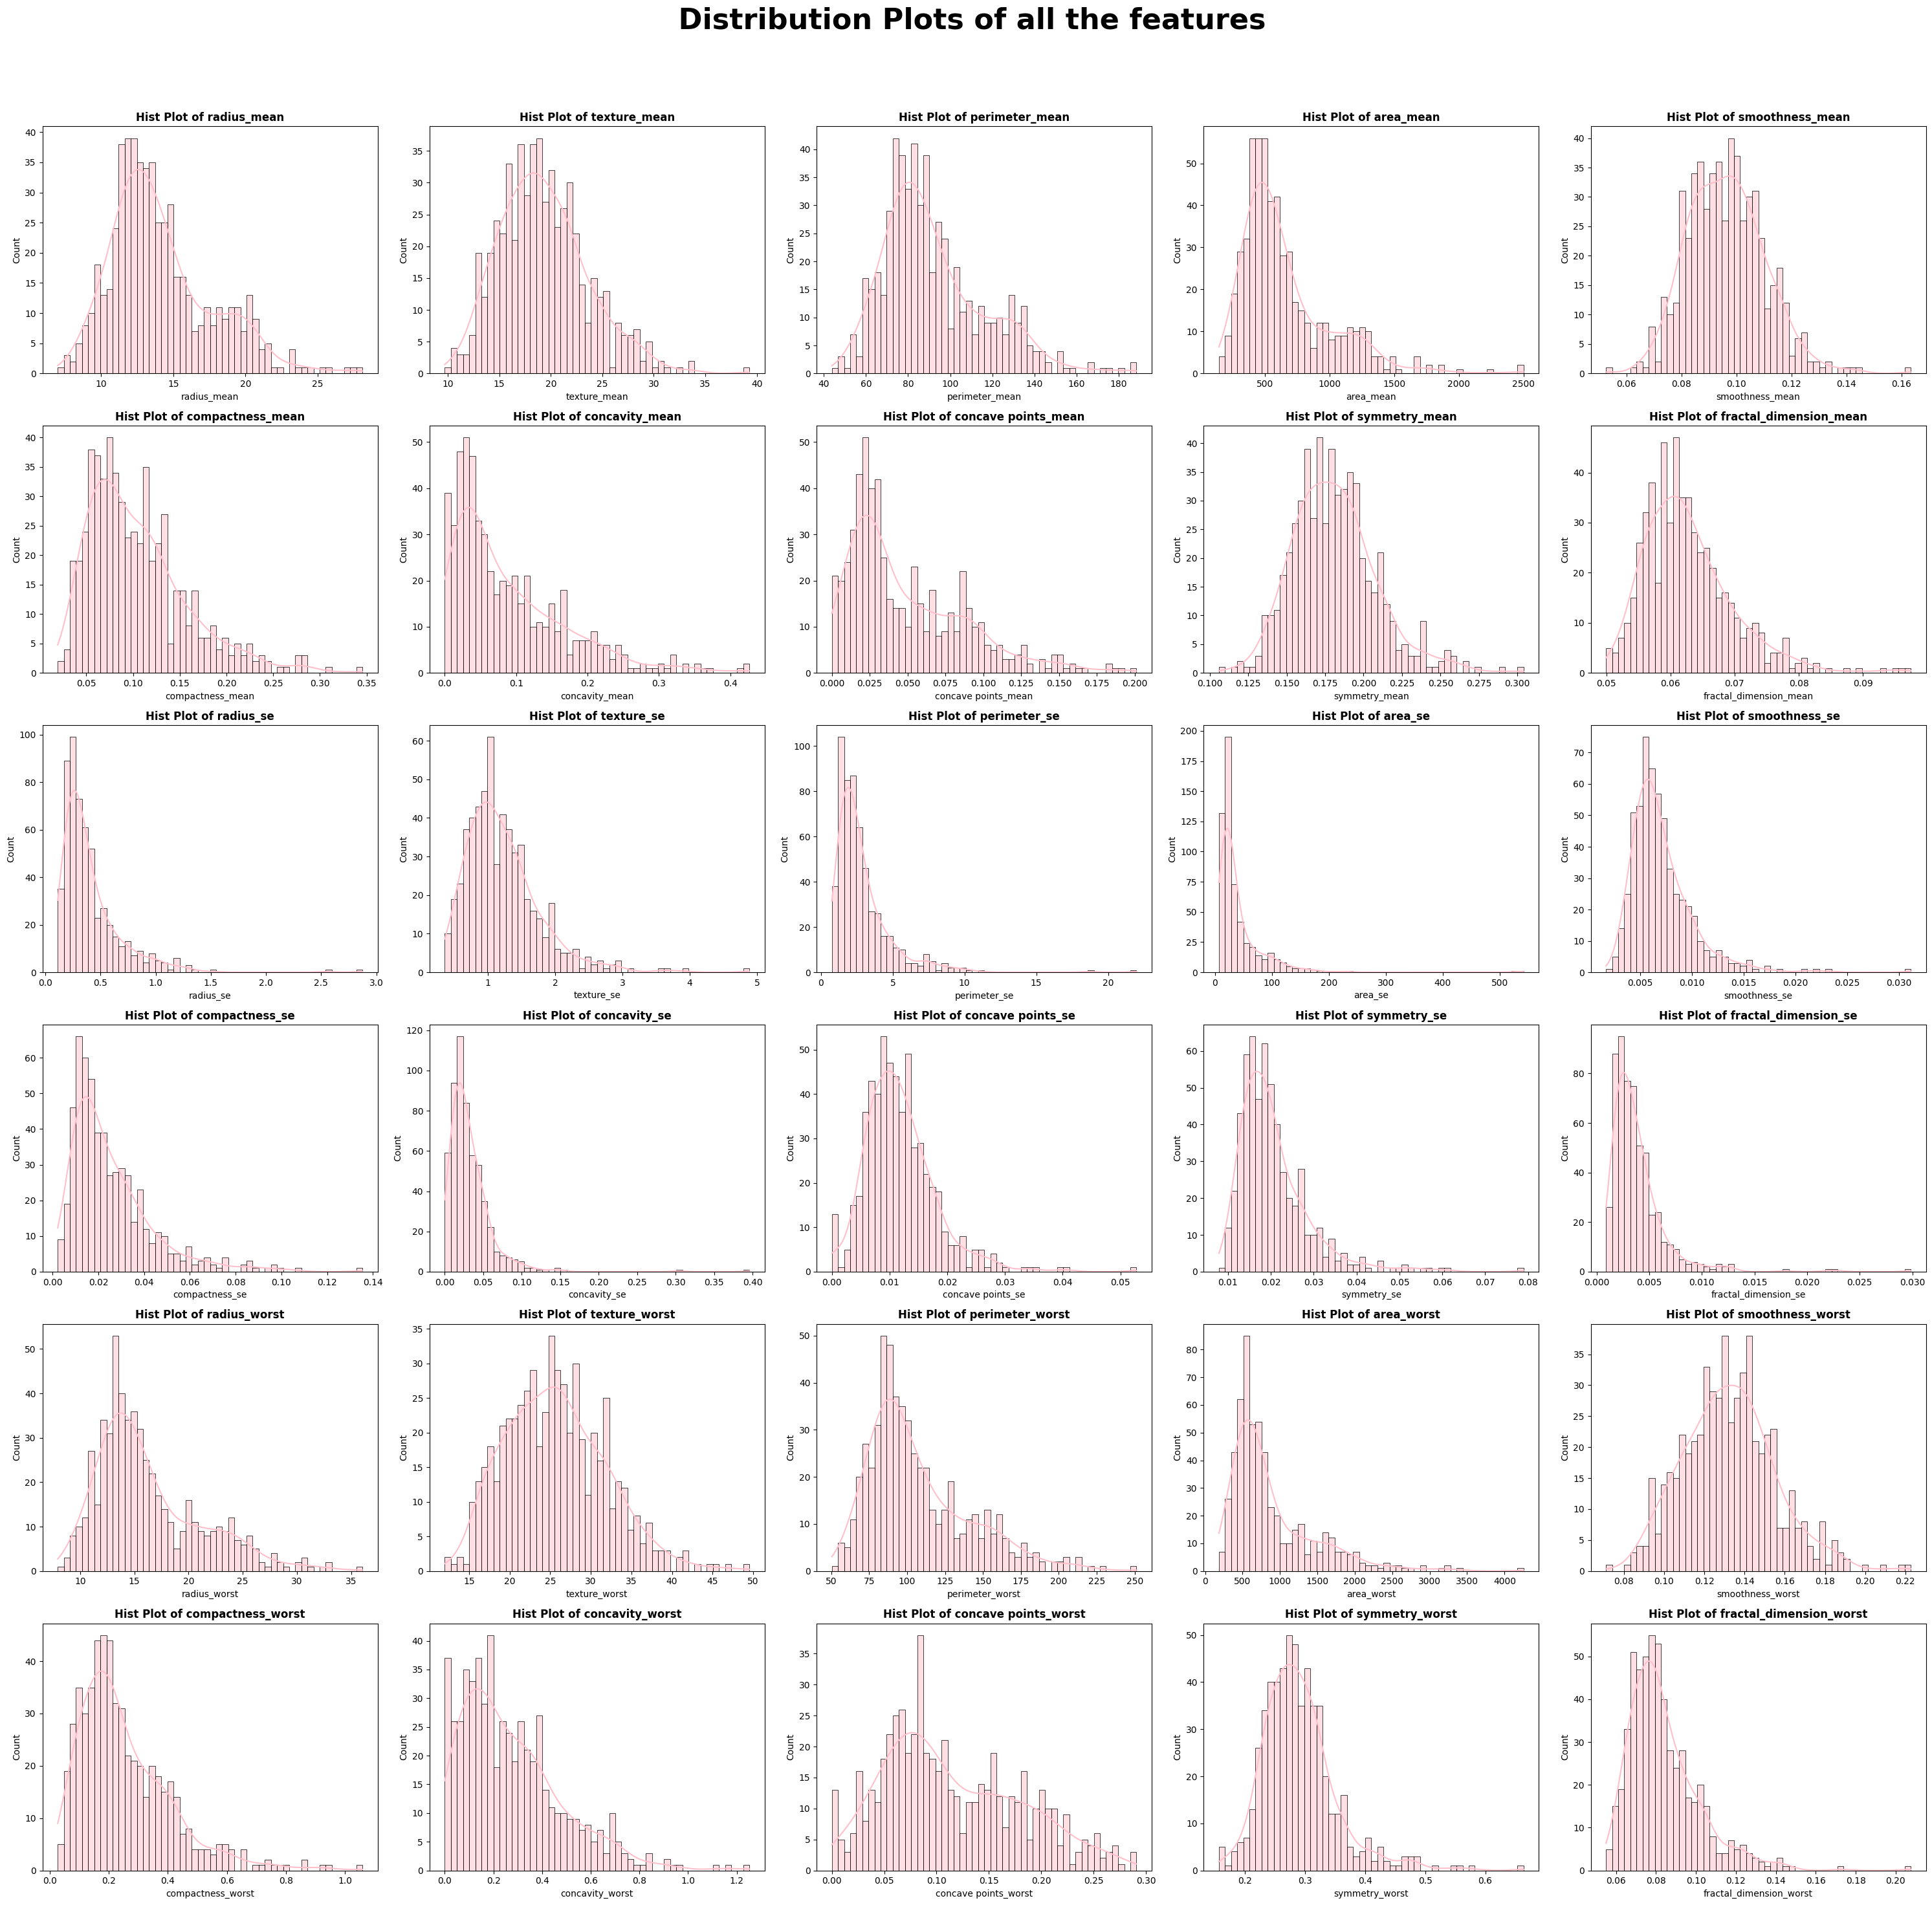

In [15]:
cols = 5
rows = math.ceil(x.columns.nunique()/cols)

fig, axes = plt.subplots(rows, cols, figsize = (30, 5*rows))

axes = axes.flatten() if rows > 1 else axes

fig.suptitle(" Distribution Plots of all the features", fontsize = 32, weight = 'bold')

for i, feature in enumerate(x.columns):
    
    if i < len(axes):
    
        sns.histplot(data = df, x = feature, ax = axes[i], bins = 50, kde = True, color = 'pink')
    
        axes[i].set_title(f"Hist Plot of {feature}", weight = 'bold')
        
for j in range(i+1, rows*cols):
    
    if j < len(axes):
        
        axes[j].set_visible(False)
        
fig.tight_layout(rect=[0, 0, 1, 0.95])

### Right-Skewed Features (Positively Skewed)

The following features exhibit right-skewed distributions:
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave points_se
- symmetry_se
- fractal_dimension_se
- compactness_worst
- concavity_worst
- concave points_worst
- fractal_dimension_worst

**Insight**: Right-skewed features often indicate the presence of outliers or rare high values. This may require transformations (like log, sqrt, or Box-Cox) to normalize the data for algorithms sensitive to distribution shape (e.g., linear models).


### Left-Skewed Features (Negatively Skewed)

The following features show a left-skewed distribution:
- fractal_dimension_mean (slightly left-skewed)
- fractal_dimension_worst (also leans slightly left)
- texture_worst (mild negative skew)

**Insight**: Left-skewed features indicate rare low values. These might require inverse or power transformations to improve symmetry, especially if the model assumes normality.

### Symmetrical or Slightly Asymmetrical Features

These features appear fairly symmetrical or only mildly skewed:
- radius_mean
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave points_mean
- symmetry_mean
- smoothness_worst
- radius_worst
- perimeter_worst
- area_worst
- symmetry_worst

**Insight**: Symmetrical distributions are well-behaved and usually require no transformation. These features are less likely to introduce bias in models sensitive to skewness.


### Why Histogram Plots Matter

Histogram (or histplot) visualizations help us understand the **distribution of numerical features**, revealing:
- Skewness (left/right)
- Presence of outliers
- Clusters or modes
- Shape (e.g., normal, uniform, bimodal)

### Why Skewness Matters:
- **Right-Skewed**: May indicate presence of high outliers; can distort mean. Transformation like `log1p()` helps compress the tail.
- **Left-Skewed**: May show saturation or floor effects; transformation like squaring or reflecting can help.
- **Symmetrical**: Typically ideal for many ML models and statistical tests.

### What We Can Do:
- Apply **normalization** or **transformation** to improve algorithm performance.
- Understand **feature importance**—a highly skewed variable might dominate distance-based models (like KNN).
- Handle outliers effectively by treating or removing extreme tails.

In short, histograms help **guide preprocessing** decisions and **build more robust models**.

# Bivariate Analysis

## Correlation Heatmap

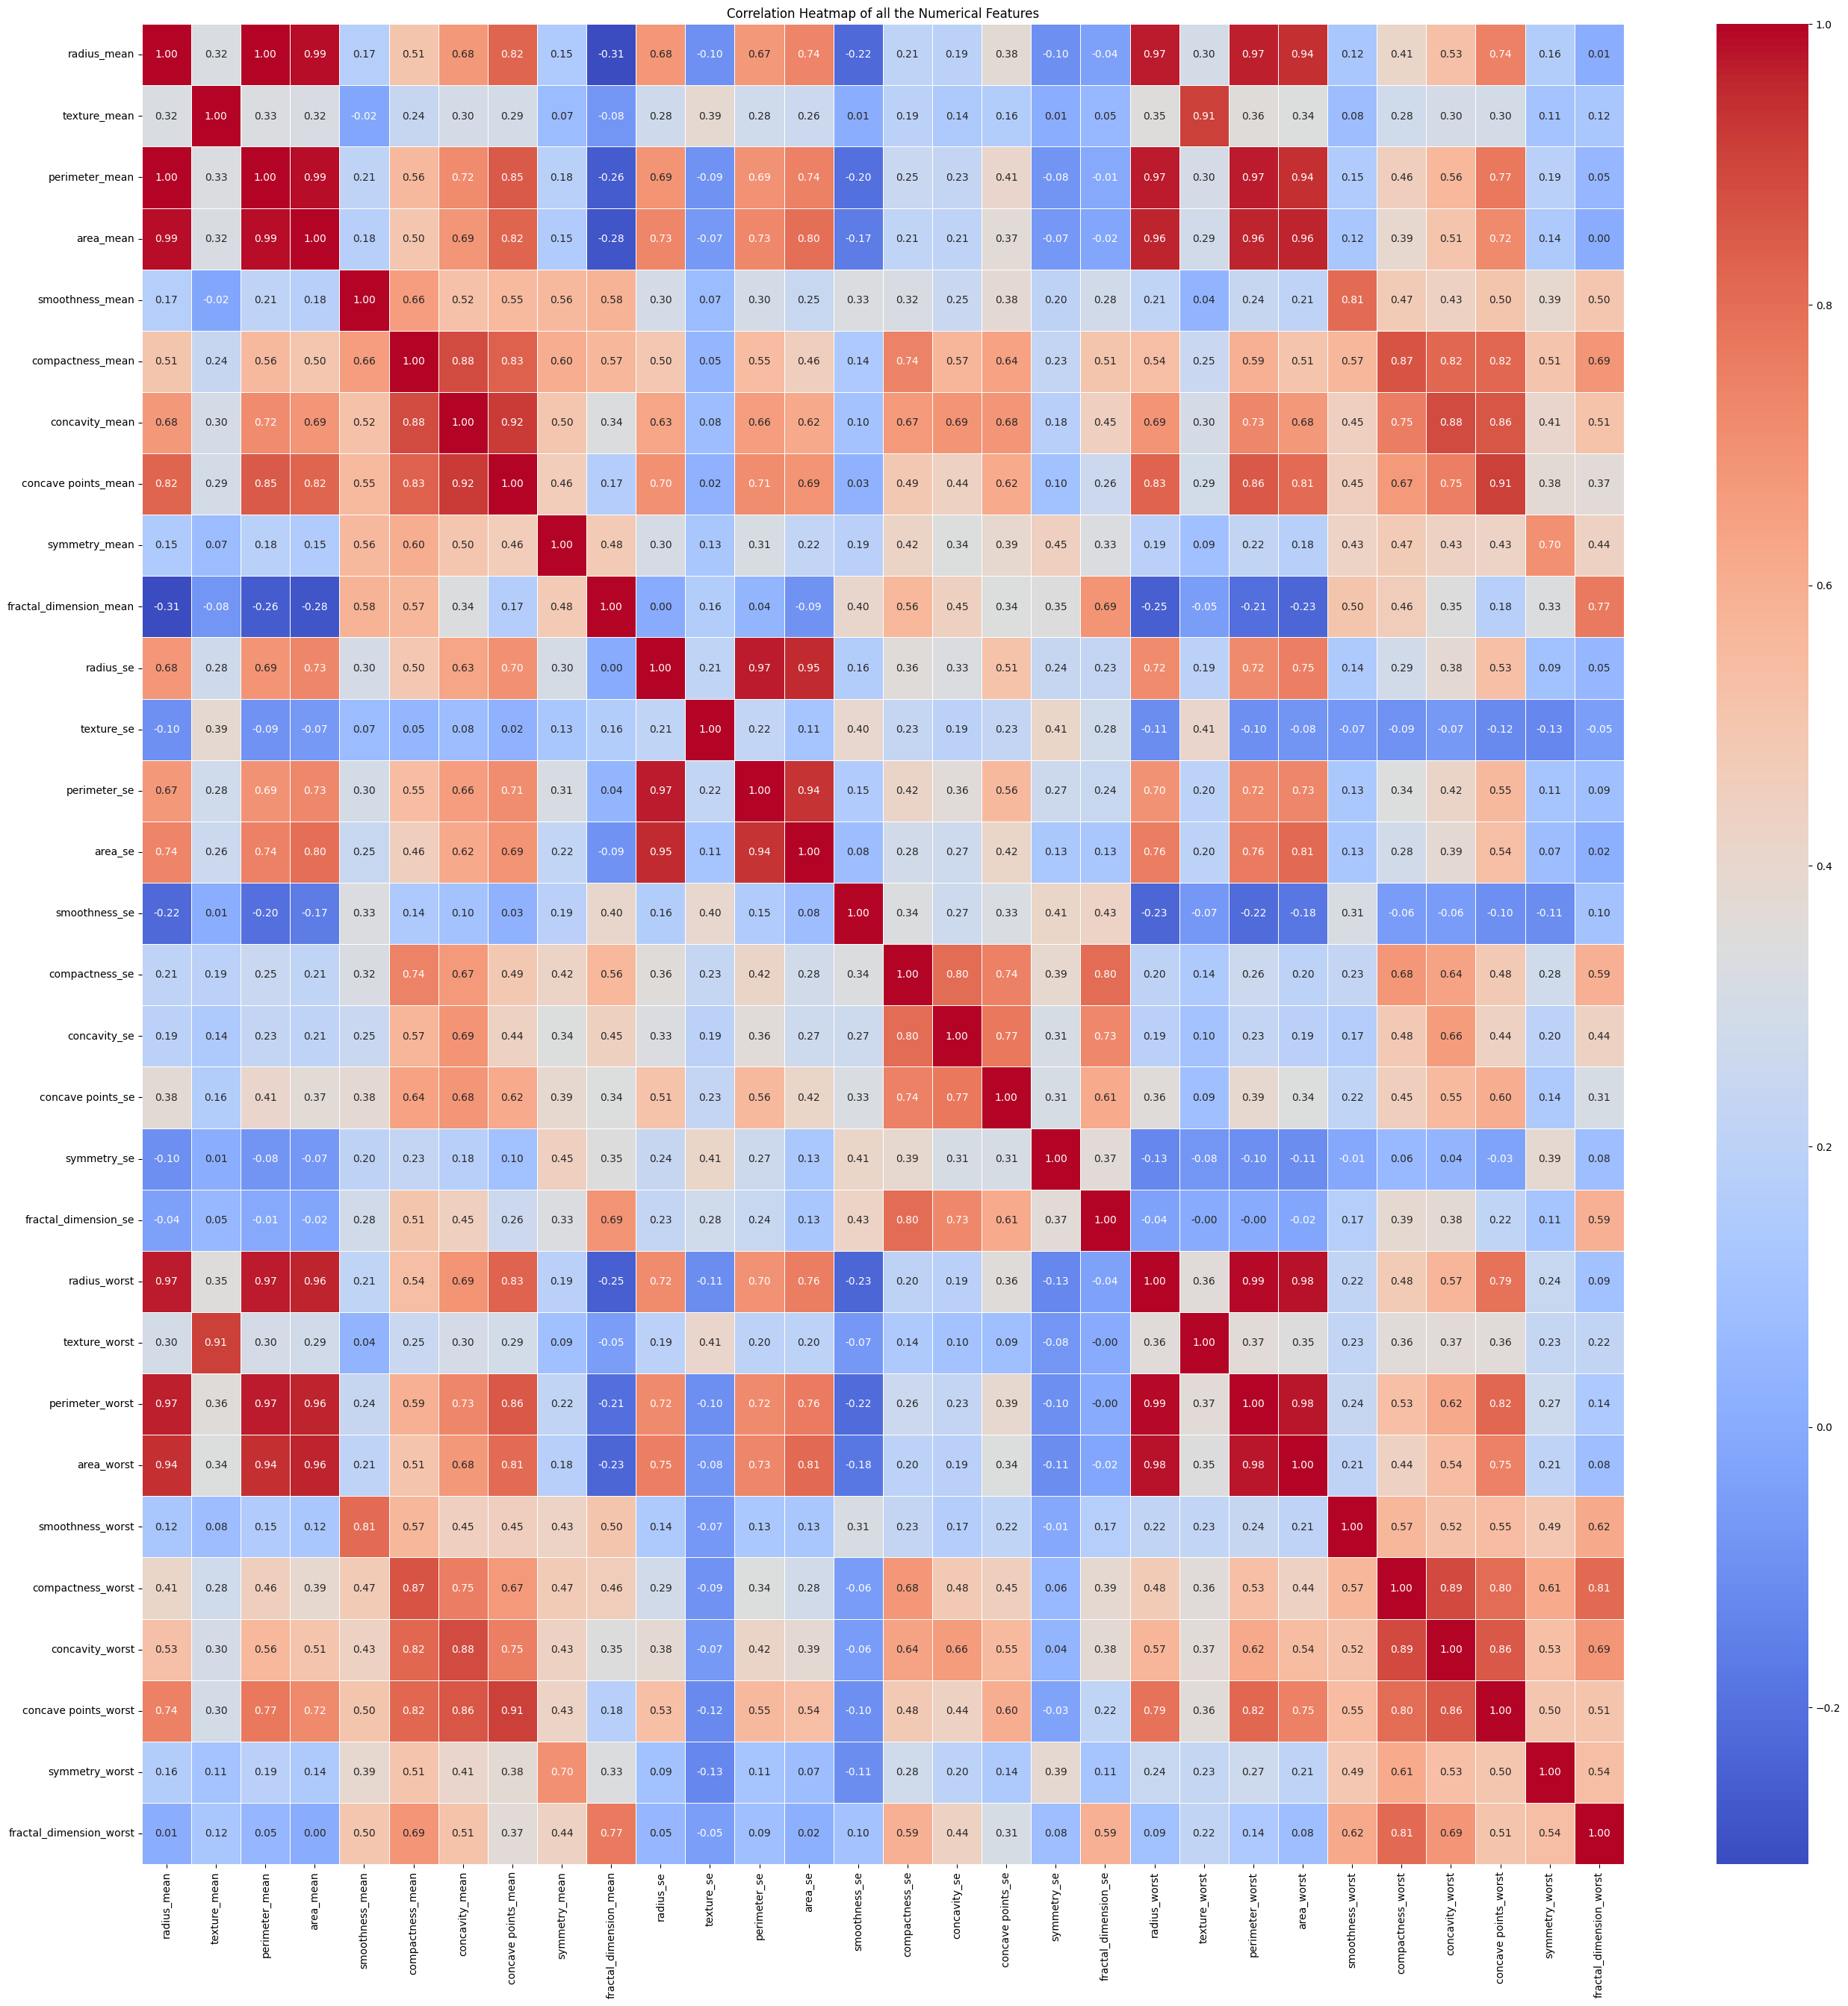

In [16]:
corr = x.corr()

plt.figure(figsize=(32, 32))

sns.heatmap(corr, annot = True, fmt='.2f', linewidths=0.5, cmap = 'coolwarm')

plt.title('Correlation Heatmap of all the Numerical Features')

plt.show()

- It's too large to analyze. So, let's do the following 

In [17]:
def categorize_correlations(corr_matrix, high_thres=0.7, moderate_thres=0.4, low_thres=0.1, max_show_weak=10):
    high_corr, moderate_corr, low_corr = [], [], []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):  # avoids symmetric duplicates
            feat1 = corr_matrix.columns[i]
            feat2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]

            abs_corr = abs(corr_val)
            if abs_corr >= high_thres:
                high_corr.append((feat1, feat2, corr_val))
            elif abs_corr >= moderate_thres:
                moderate_corr.append((feat1, feat2, corr_val))
            elif abs_corr >= low_thres:
                low_corr.append((feat1, feat2, corr_val))

    # Sorting all by absolute correlation value (descending)
    high_corr.sort(key=lambda x: abs(x[2]), reverse=True)
    moderate_corr.sort(key=lambda x: abs(x[2]), reverse=True)
    low_corr.sort(key=lambda x: abs(x[2]), reverse=True)

    # Reporting
    print("\n=== CORRELATION ANALYSIS ===\n")

    def print_corr(label, corr_list, max_items=None):
        print(f"The features which are {label} correlated are:")
        if not corr_list:
            print("  None found\n")
        else:
            show = corr_list[:max_items] if max_items else corr_list
            for f1, f2, val in show:
                print(f"  • {f1} vs {f2}: {val:.2f}")
            if max_items and len(corr_list) > max_items:
                print(f"  ... and {len(corr_list) - max_items} more\n")

    print_corr("highly (|r| ≥ 0.7)", high_corr)
    print()
    print_corr("moderately (0.4 ≤ |r| < 0.7)", moderate_corr)
    print()
    print_corr("weakly (0.1 ≤ |r| < 0.4)", low_corr, max_items=max_show_weak)

    return high_corr, moderate_corr, low_corr

In [18]:
high, moderate, low = categorize_correlations(corr)


=== CORRELATION ANALYSIS ===

The features which are highly (|r| ≥ 0.7) correlated are:
  • radius_mean vs perimeter_mean: 1.00
  • radius_worst vs perimeter_worst: 0.99
  • radius_mean vs area_mean: 0.99
  • perimeter_mean vs area_mean: 0.99
  • radius_worst vs area_worst: 0.98
  • perimeter_worst vs area_worst: 0.98
  • radius_se vs perimeter_se: 0.97
  • perimeter_mean vs perimeter_worst: 0.97
  • radius_mean vs radius_worst: 0.97
  • perimeter_mean vs radius_worst: 0.97
  • radius_mean vs perimeter_worst: 0.97
  • area_mean vs radius_worst: 0.96
  • area_mean vs area_worst: 0.96
  • area_mean vs perimeter_worst: 0.96
  • radius_se vs area_se: 0.95
  • perimeter_mean vs area_worst: 0.94
  • radius_mean vs area_worst: 0.94
  • perimeter_se vs area_se: 0.94
  • concavity_mean vs concave points_mean: 0.92
  • texture_mean vs texture_worst: 0.91
  • concave points_mean vs concave points_worst: 0.91
  • compactness_worst vs concavity_worst: 0.89
  • concavity_mean vs concavity_worst: 0.

# Feature Importance

## Random Forest Model for feature importance 

In [19]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

def random_forest_feature_importance(X, y, task_type='classification',
                                    n_estimators=100, max_depth=None,
                                    min_samples_split=2, min_samples_leaf=1,
                                    max_features='auto', bootstrap=True,
                                    random_state=42, top_n_features=20,
                                    show_plot=True, plot_size=(12, 8)):
    
    # Input validation
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    
    # Train-test split
    X_train, x_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Initialize Random Forest with RF-specific parameters
    if task_type == 'classification':
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=bootstrap,
            random_state=random_state,
            n_jobs=-1  # Use all cores
        )
    elif task_type == 'regression':
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=bootstrap,
            random_state=random_state,
            n_jobs=-1
        )
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Get importance scores
    importances = model.feature_importances_
    feature_names = X.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances,
        'Std_Deviation': std
    }).sort_values('Importance', ascending=False)
    
    # Select top N features
    if top_n_features:
        importance_df = importance_df.head(top_n_features)
    
    # Enhanced visualization
    if show_plot:
        plt.figure(figsize=plot_size)
        importance_df = importance_df.sort_values('Importance', ascending=True)
        
        # Create colored bars (gradient from low to high importance)
        colors = plt.cm.viridis(np.linspace(0.2, 1, len(importance_df)))
        
        bars = plt.barh(importance_df['Feature'], 
                       importance_df['Importance'], 
                       color=colors,
                       xerr=importance_df['Std_Deviation'],
                       capsize=3)
        
        # Style the plot
        plt.xlabel('Mean Decrease in Impurity (MDI)', fontsize=12)
        plt.title('Random Forest Feature Importance', fontsize=14, pad=20)
        plt.grid(axis='x', alpha=0.3)
        
        # Add importance values on bars
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.005, 
                    bar.get_y() + bar.get_height()/2, 
                    f'{width:.4f}',
                    va='center',
                    fontsize=10)
        
        # Add RF hyperparameters as annotation
        params_text = (
            f"RF Hyperparameters:\n"
            f"n_estimators={n_estimators}, max_features={max_features}\n"
            f"max_depth={max_depth}, min_samples_split={min_samples_split}"
        )
        plt.annotate(params_text,
                    xy=(0.98, 0.02),
                    xycoords='axes fraction',
                    ha='right',
                    va='bottom',
                    bbox=dict(boxstyle='round', alpha=0.1))
        
        plt.tight_layout()
        plt.show()
    
    return importance_df


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


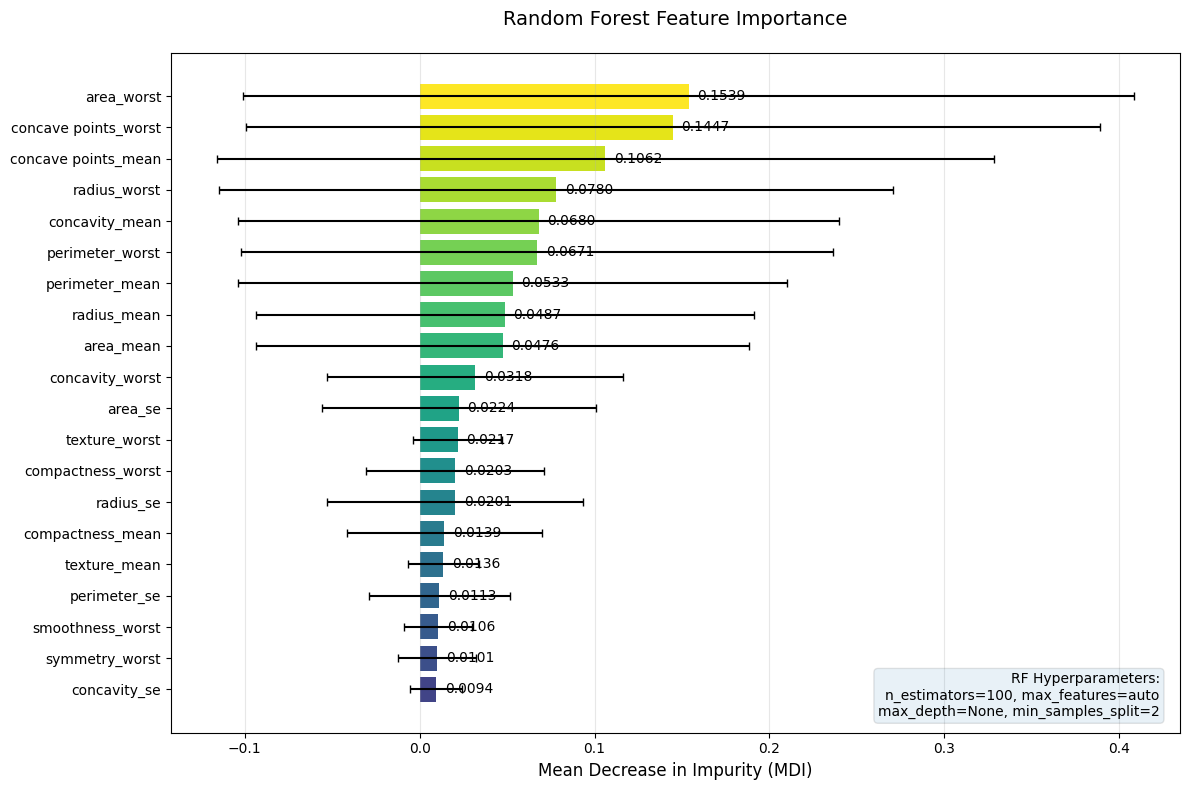

,Feature,Importance,Std_Deviation
16,concavity_se,0.009386,0.014976
28,symmetry_worst,0.010120,0.022314
24,smoothness_worst,0.010644,0.019566
12,perimeter_se,0.011303,0.040185
1,texture_mean,0.013591,0.020362
5,compactness_mean,0.013944,0.055750
10,radius_se,0.020139,0.073237
25,compactness_worst,0.020266,0.050953
21,texture_worst,0.021749,0.025477
13,area_se,0.022407,0.078519


In [20]:
random_forest_feature_importance(x,y)

From this data, let us drop features having feature importance less than 0.01 and correlation value having more 0.95.

But let us not drop all features having 0.95, we'll keep one of it and drop the remaining.

In [21]:
# Drop highly correlated and less important features

features_to_drop = [
    'perimeter_mean',
    'area_mean',
    'radius_worst',
    'perimeter_worst',
    'radius_se',
    'perimeter_se',
    'area_se',
    'concavity_worst',
    'concavity_mean',
    'compactness_mean',
    'compactness_worst',
    'concave points_se',
]

x_reduced = x.drop(columns=features_to_drop)

In [22]:
x_reduced.columns.to_list()

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'symmetry_se',
 'fractal_dimension_se',
 'texture_worst',
 'area_worst',
 'smoothness_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [23]:
x_reduced.columns.nunique()

18

In [24]:
x = x_reduced

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = LabelEncoder().fit_transform(df['diagnosis'])
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [26]:
print(df['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32


# Outlier Handling 

In [27]:
import pandas as pd

def handle_outliers_iqr(df, features, strategy='cap'):
    
    df = df.copy()
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if strategy == 'remove':
            df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
        elif strategy == 'cap':
            df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
        else:
            raise ValueError("Strategy must be either 'remove' or 'cap'")
    
    return df

# Example Usage:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_cleaned = handle_outliers_iqr(df, numerical_features, strategy='cap')

In [28]:
df = df_cleaned.copy()

In [29]:
x.columns.tolist()

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'symmetry_se',
 'fractal_dimension_se',
 'texture_worst',
 'area_worst',
 'smoothness_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# Box Plots after Outlier Handling

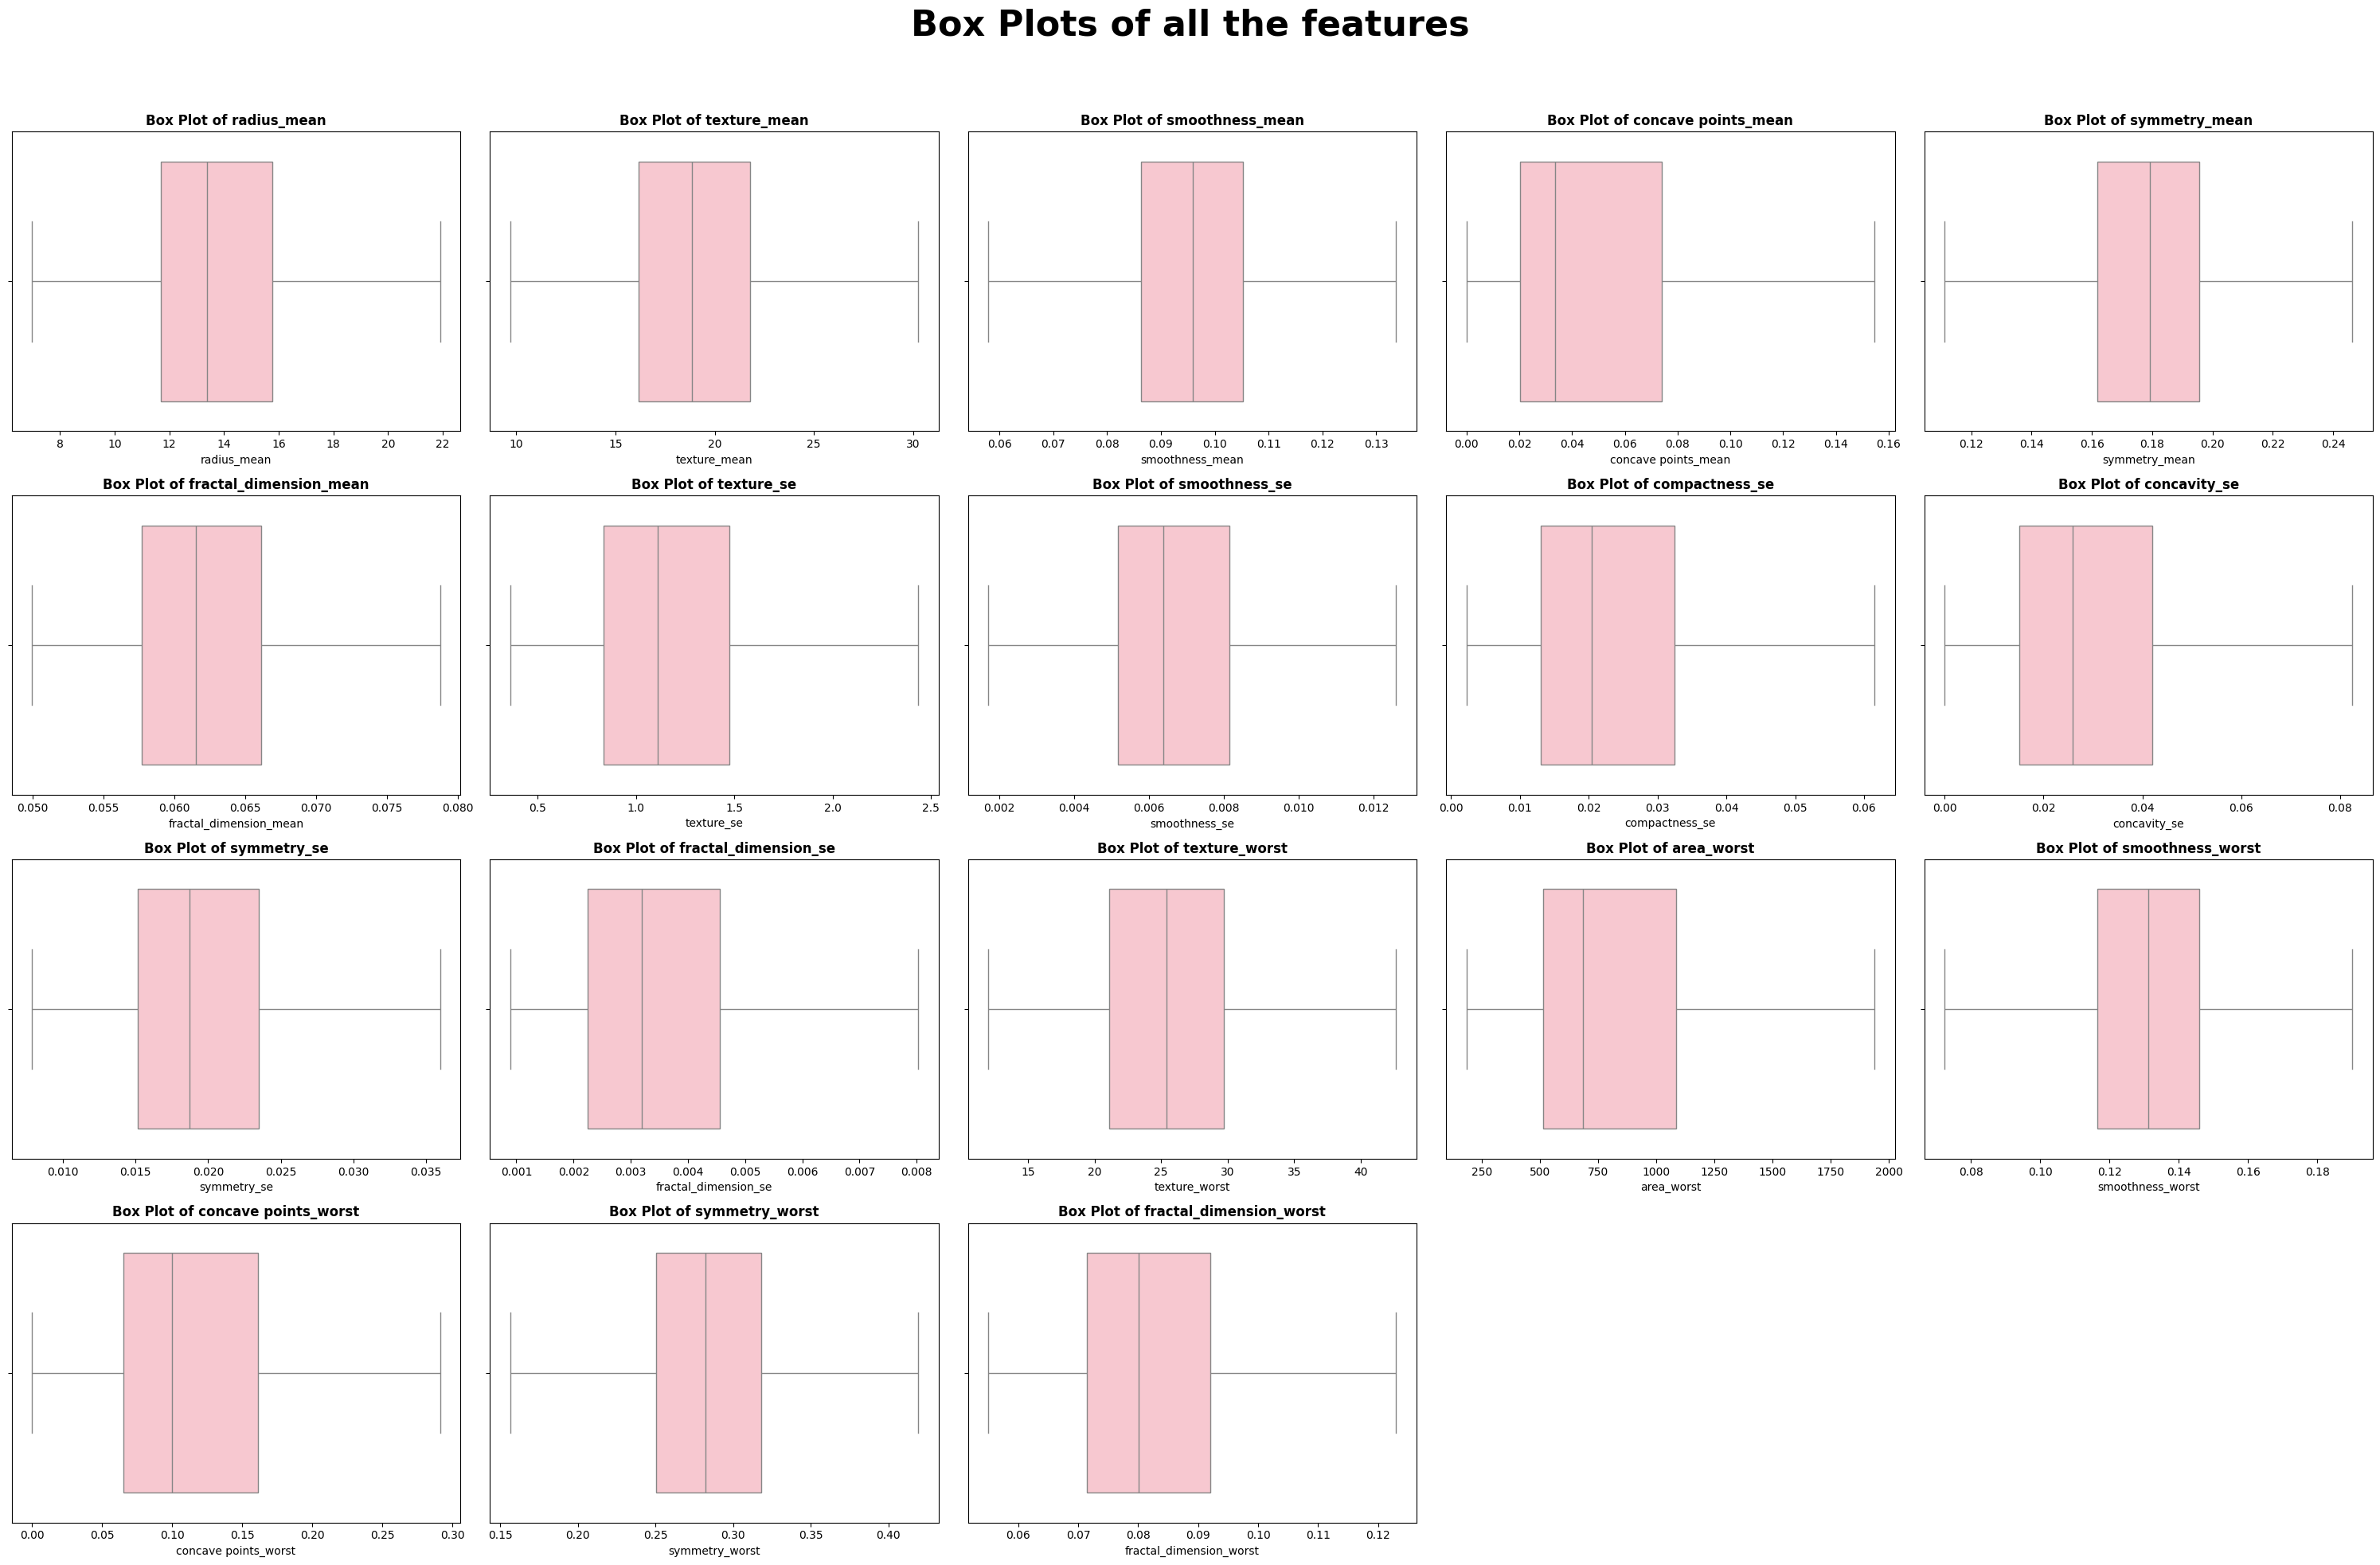

In [30]:
cols = 5
rows = math.ceil(x.columns.nunique()/cols)

fig, axes = plt.subplots(rows, cols, figsize = (30, 5*rows))

axes = axes.flatten() if rows > 1 else axes

fig.suptitle("Box Plots of all the features", fontsize = 32, weight = 'bold')

for i, feature in enumerate(x.columns):
    
    if i < len(axes):
    
        sns.boxplot(data = df, x = feature, ax = axes[i], color = 'pink')
    
        axes[i].set_title(f"Box Plot of {feature}", weight = 'bold')
        
for j in range(i+1, rows*cols):
    
    if j < len(axes):
        
        axes[j].set_visible(False)
        
fig.tight_layout(rect=[0, 0, 1, 0.95])

- All the outliers are now handled properly

# Model Training 

### Importing Libraries 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D

### Train-Test Split 

In [32]:
# Replace df, features, and target with your actual dataset and labels
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Pipeline + Hyperparameter Grid + Grid Search CV

In [33]:
param_grid = {
    'pca__n_components': [5, 10, 15],
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.01, 0.05, 0.1],
    'svc__gamma': ['scale'],
    'svc__class_weight': ['balanced', None],
}

svc = SVC(
    C=1.0,                         # Regularization strength
    kernel='rbf',                  # 'linear', 'poly', 'rbf', 'sigmoid'
    degree=3,                      # Only for 'poly'
    gamma='scale',                 # 'scale' or 'auto'
    coef0=0.0,                     # Only for 'poly' & 'sigmoid'
    shrinking=True,                # Use shrinking heuristic
    probability=False,             # Turn on for predict_proba (slower)
    tol=0.001,                     # Stopping criterion tolerance
    cache_size=200,                # MB for kernel cache
    class_weight=None,             # None, 'balanced', or dict
    verbose=False,                 # Enable for debug logs
    max_iter=-1,                   # -1 for no limit
    decision_function_shape='ovr', # 'ovo' or 'ovr'
    break_ties=False,              # If True, break ties in probability
    random_state=42                # for reproducibility
)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2, return_train_score=True)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [5, 10, 15],
                         'svc__C': [0.01, 0.05, 0.1],
                         'svc__class_weight': ['balanced', None],
                         'svc__gamma': ['scale'],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=2)

### Extracting Best Models for Each Kernel Type

In [34]:
# Get all CV results as DataFrame

results_df = pd.DataFrame(grid.cv_results_)


# Best linear model

linear_df = results_df[results_df['param_svc__kernel'] == 'linear']
best_linear_index = linear_df['mean_test_score'].idxmax()
best_linear_params = results_df.loc[best_linear_index, 'params']
best_linear_model = grid.cv_results_['params'][best_linear_index]


# Best RBF model

rbf_df = results_df[results_df['param_svc__kernel'] == 'rbf']
best_rbf_index = rbf_df['mean_test_score'].idxmax()
best_rbf_params = results_df.loc[best_rbf_index, 'params']
best_rbf_model = grid.cv_results_['params'][best_rbf_index]


# Print best configurations

print("Best Linear Kernel Params:", best_linear_params)
print("Best RBF Kernel Params:", best_rbf_params)

Best Linear Kernel Params: {'pca__n_components': 15, 'svc__C': 0.1, 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best RBF Kernel Params: {'pca__n_components': 10, 'svc__C': 0.1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


### Refit Best Linear and RBF Models Separately

In [35]:
# Refit of best linear model
pipe_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_linear_params['pca__n_components'])),
    ('svc', SVC(
        kernel='linear',
        C=best_linear_params['svc__C'],
        gamma='scale',
        class_weight=best_linear_params['svc__class_weight'],
        random_state=42
    ))
])

pipe_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_rbf_params['pca__n_components'])),
    ('svc', SVC(
        kernel='rbf',
        C=best_rbf_params['svc__C'],
        gamma='scale',
        class_weight=best_rbf_params['svc__class_weight'],
        random_state=42
    ))
])

# Fit both
pipe_linear.fit(X_train, y_train)
pipe_rbf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('svc', SVC(C=0.1, class_weight='balanced', random_state=42))])

### Classification Report 

In [36]:
# Predictions
y_pred_linear = pipe_linear.predict(X_test)
y_pred_rbf = pipe_rbf.predict(X_test)

# Reports
print("Classification Report: Linear SVM")
print(classification_report(y_test, y_pred_linear, target_names=["Benign", "Malignant"]))

print("Classification Report: RBF SVM")
print(classification_report(y_test, y_pred_rbf, target_names=["Benign", "Malignant"]))

Classification Report: Linear SVM
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Classification Report: RBF SVM
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        72
   Malignant       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### 2D Decision Boundary Visualization 

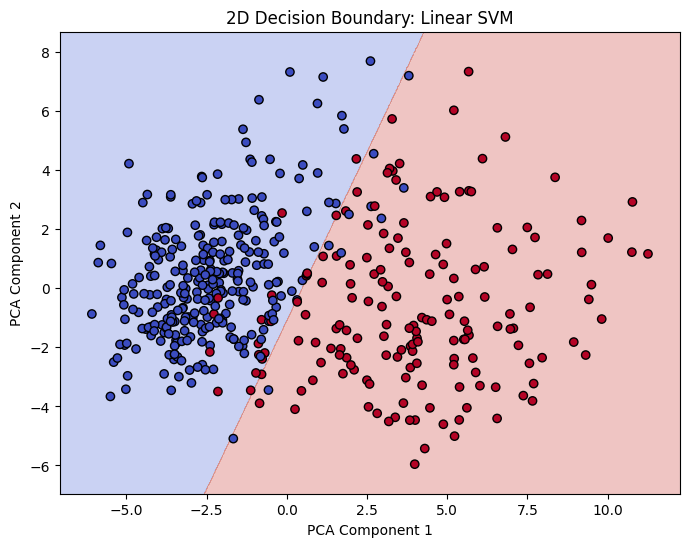

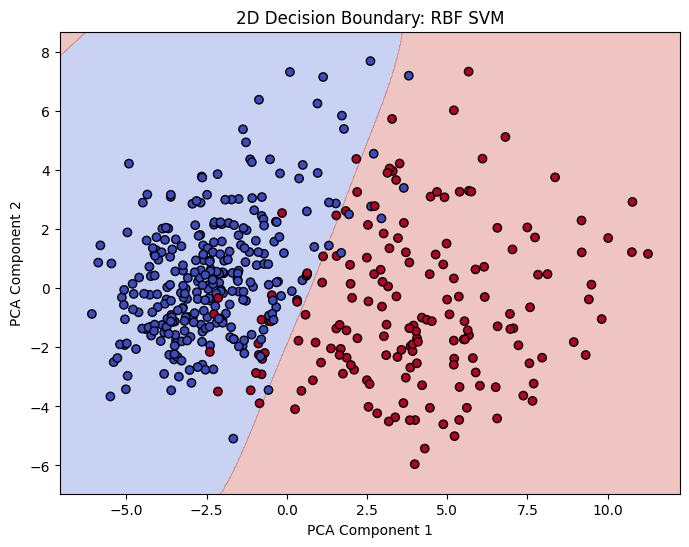

In [37]:
# 1. Prepare 2D PCA training data for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)       # scale original 30-dim data
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)      # reduce to 2 dims

# 2. Create and train manual SVC models on 2D data

# Linear SVM with best-found params
linear_svc_2d = SVC(
    kernel='linear',
    C=grid.best_params_['svc__C'],
    class_weight=grid.best_params_['svc__class_weight'],
    random_state=42
)
linear_svc_2d.fit(X_pca_2d, y_train)

# RBF SVM with best-found params
rbf_svc_2d = SVC(
    kernel='rbf',
    C=grid.best_params_['svc__C'],
    gamma=grid.best_params_['svc__gamma'],
    class_weight=grid.best_params_['svc__class_weight'],
    random_state=42
)
rbf_svc_2d.fit(X_pca_2d, y_train)


# 3. Plotting function
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# 4. Plot both boundaries
plot_decision_boundary(linear_svc_2d, X_pca_2d, y_train, "2D Decision Boundary: Linear SVM")
plot_decision_boundary(rbf_svc_2d,    X_pca_2d, y_train, "2D Decision Boundary: RBF SVM")
plt.show()

### Learning Curve (Model Performance vs Training Size)

Learning Curve for Linear SVM:


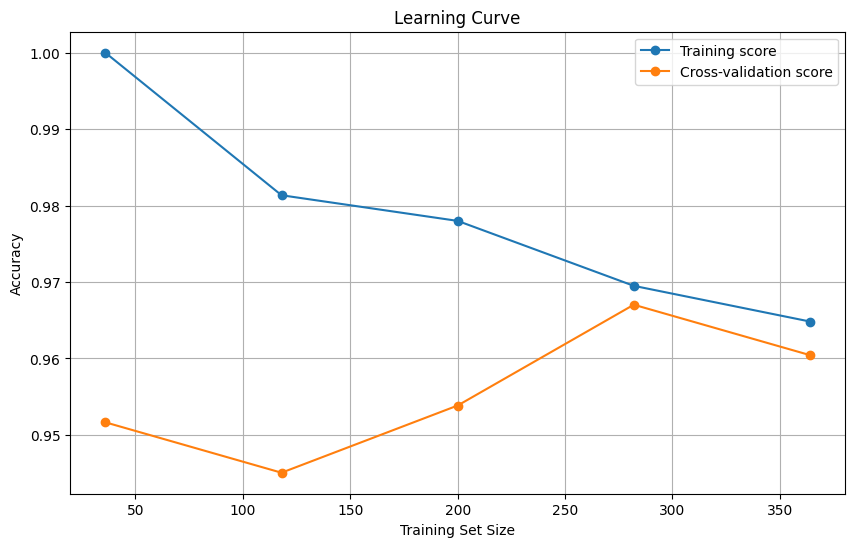

Learning Curve for RBF SVM:


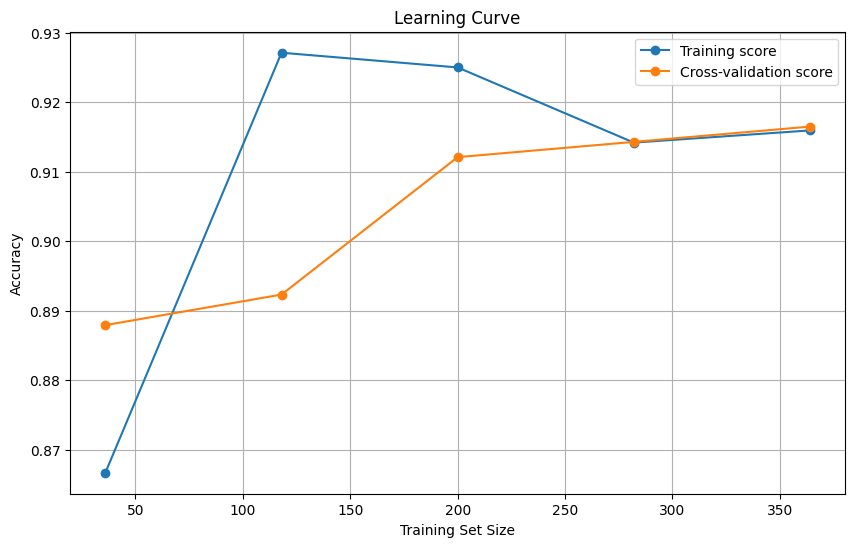

In [38]:
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training score", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", marker='o')
    
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Prepare the models for Linear SVM and RBF SVM
linear_svc_2d = SVC(
    kernel='linear',
    C=best_linear_params['svc__C'],
    class_weight=best_linear_params['svc__class_weight'],
    random_state=42
)

rbf_svc_2d = SVC(
    kernel='rbf',
    C=best_rbf_params['svc__C'],
    gamma=best_rbf_params['svc__gamma'],
    class_weight=best_rbf_params['svc__class_weight'],
    random_state=42
)

# Plot learning curves for both Linear and RBF models
print("Learning Curve for Linear SVM:")
plot_learning_curve(clone(linear_svc_2d), X_train, y_train, cv=StratifiedKFold(5))

print("Learning Curve for RBF SVM:")
plot_learning_curve(clone(rbf_svc_2d), X_train, y_train, cv=StratifiedKFold(5))